In [2]:
pip install kagglehub

Note: you may need to restart the kernel to use updated packages.


In [30]:
import pandas as pd
import numpy as np
import requests
import glob
import re
import plotly.express as px
import kagglehub
path = kagglehub.dataset_download("pashupatigupta/emotion-detection-from-text")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\ayush\.cache\kagglehub\datasets\pashupatigupta\emotion-detection-from-text\versions\1


In [6]:
pip install kaggle

In [7]:
path

'C:\\Users\\ayush\\.cache\\kagglehub\\datasets\\pashupatigupta\\emotion-detection-from-text\\versions\\1'

In [8]:
import os
files = os.listdir(path)
print("Files in the dataset directory:", files)

Files in the dataset directory: ['tweet_emotions.csv']


In [9]:
files

['tweet_emotions.csv']

In [13]:
csv_path = os.path.join(path, 'tweet_emotions.csv')

In [14]:
csv_path

'C:\\Users\\ayush\\.cache\\kagglehub\\datasets\\pashupatigupta\\emotion-detection-from-text\\versions\\1\\tweet_emotions.csv'

In [15]:
data = pd.read_csv(csv_path)

In [16]:
data.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


In [18]:
def preprocessText(text):
    text = re.sub(r"@\w+|#\w+", "", text)
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    text = text.lower().strip()
    return text

data['newcontent'] = data['content'].apply(preprocessText)

In [20]:
data.drop(columns=['content'],inplace = True)

In [21]:
data.shape

(40000, 3)

In [22]:
data.size

120000

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet_id    40000 non-null  int64 
 1   sentiment   40000 non-null  object
 2   newcontent  40000 non-null  object
dtypes: int64(1), object(2)
memory usage: 937.6+ KB


In [24]:
data.drop(columns=['tweet_id'],inplace = True)

In [25]:
data.isnull().sum()

sentiment     0
newcontent    0
dtype: int64

In [27]:
data.sample(10)

,sentiment,newcontent
3842,surprise,has tickets
13658,surprise,oh im jealous how surprising
16762,sadness,id seriously kill for a bath the now but we o...
33781,happiness,had one of the greatest days ever spent the wh...
36048,love,no stay and play
24639,surprise,thx for following
20846,love,morning all just into the office now
28087,worry,thanks sankar for ur wishes
29064,happiness,congrats to dave amp anna surprise proposal at...
24090,neutral,taking the day off and doing absolutely nothin...


In [33]:
len(data['sentiment'].value_counts())

13

In [34]:
data['sentiment'].value_counts()

sentiment
neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: count, dtype: int64

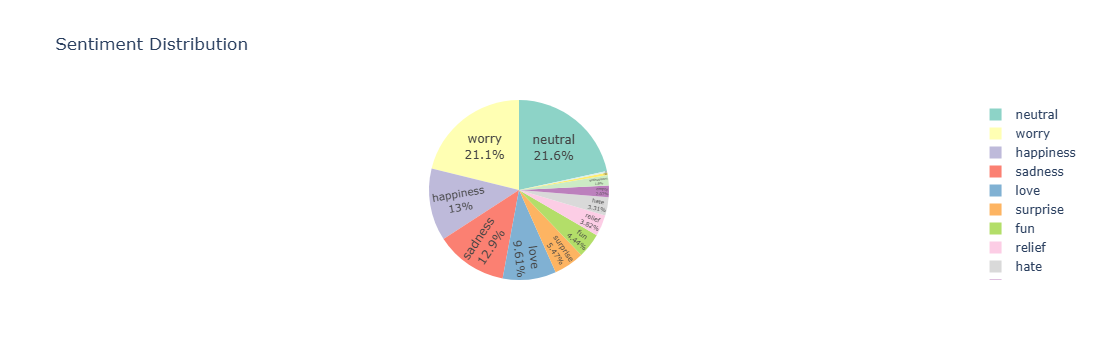

In [32]:
sentiment_counts = data['sentiment'].value_counts().reset_index()
sentiment_counts.columns = ['sentiment', 'count']

fig = px.pie(sentiment_counts, 
             names='sentiment', 
             values='count', 
             title='Sentiment Distribution',
             labels={'sentiment': 'Sentiment'},
             color_discrete_sequence=px.colors.qualitative.Set3)

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [35]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['sentiment_label'] = label_encoder.fit_transform(data['sentiment'])

print(label_encoder.classes_)

['anger' 'boredom' 'empty' 'enthusiasm' 'fun' 'happiness' 'hate' 'love'
 'neutral' 'relief' 'sadness' 'surprise' 'worry']


In [36]:
data

,sentiment,newcontent,sentiment_label
0,empty,i know i was listenin to bad habit earlier an...,2
1,sadness,layin n bed with a headache ughhhhwaitin on y...,10
2,sadness,funeral ceremonygloomy friday,10
3,enthusiasm,wants to hang out with friends soon,3
4,neutral,we want to trade with someone who has houston ...,8
...,...,...,...
39995,neutral,,8
39996,love,happy mothers day all my love,7
39997,love,happy mothers day to all the mommies out there...,7
39998,happiness,wassup beautiful follow me peep out my new hi...,5


In [37]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=1000) 
X = vectorizer.fit_transform(data['newcontent'])

print("Vocabulary size:", len(vectorizer.get_feature_names_out()))
print(X.toarray()[:5])

Vocabulary size: 1000
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [38]:
from sklearn.model_selection import train_test_split

y = data['sentiment_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)

  (0, 637)	1
  (1, 947)	1
  (1, 69)	1
  (1, 422)	1
  (1, 814)	2
  (1, 424)	1
  (1, 812)	1
  (1, 322)	1
  (1, 700)	1
  (1, 164)	1
  (1, 944)	1
  (1, 546)	1
  (2, 51)	1
  (2, 455)	1
  (2, 288)	1
  (2, 746)	1
  (2, 76)	1
  (2, 958)	2
  (2, 456)	1
  (2, 839)	1
  (2, 638)	1
  (2, 850)	1
  (2, 635)	1
  (3, 844)	1
  (3, 31)	1
  :	:
  (31997, 99)	1
  (31997, 682)	1
  (31998, 62)	1
  (31998, 989)	1
  (31998, 814)	1
  (31998, 414)	1
  (31998, 424)	1
  (31998, 372)	1
  (31998, 934)	1
  (31998, 580)	1
  (31998, 122)	1
  (31998, 501)	1
  (31998, 842)	1
  (31998, 541)	1
  (31998, 776)	1
  (31998, 301)	1
  (31999, 908)	1
  (31999, 915)	1
  (31999, 722)	1
  (31999, 568)	1
  (31999, 424)	1
  (31999, 802)	1
  (31999, 841)	2
  (31999, 539)	1
  (31999, 762)	1
  (0, 323)	1
  (0, 540)	1
  (1, 31)	1
  (1, 590)	1
  (1, 555)	1
  (1, 814)	1
  (1, 434)	1
  (1, 427)	1
  (1, 288)	1
  (1, 159)	1
  (1, 879)	1
  (1, 655)	1
  (1, 339)	1
  (1, 605)	1
  (1, 688)	1
  (1, 983)	1
  (2, 989)	1
  (2, 426)	1
  (2, 356)	1
  (2

In [41]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [42]:
y_pred = model.predict(X_test)

In [43]:
y_pred

array([ 5,  8,  5, ..., 10, 12,  5])

In [44]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Accuracy: 0.335375
              precision    recall  f1-score   support

       anger       0.00      0.00      0.00        19
     boredom       0.00      0.00      0.00        31
       empty       0.07      0.01      0.02       162
  enthusiasm       0.04      0.01      0.01       163
         fun       0.19      0.06      0.09       338
   happiness       0.33      0.37      0.35      1028
        hate       0.39      0.24      0.29       268
        love       0.42      0.40      0.41       762
     neutral       0.34      0.49      0.40      1740
      relief       0.22      0.06      0.09       352
     sadness       0.33      0.25      0.28      1046
    surprise       0.20      0.08      0.12       425
       worry       0.33      0.44      0.38      1666

    accuracy                           0.34      8000
   macro avg       0.22      0.19      0.19      8000
weighted avg       0.31      0.34      0.31      8000

